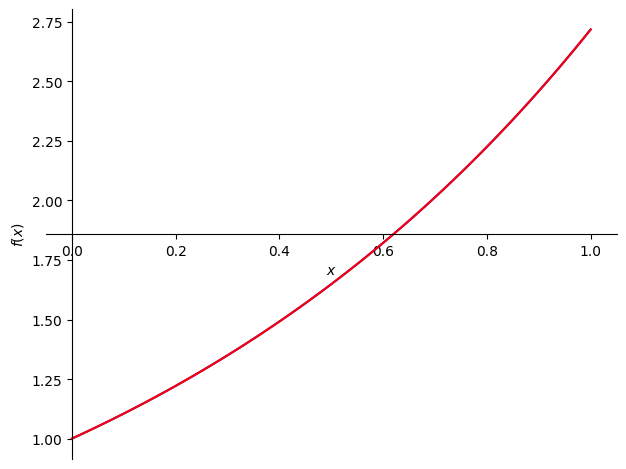

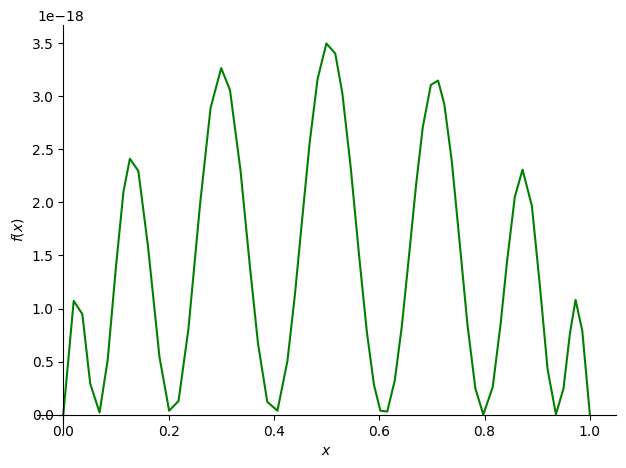

In [24]:
from sympy import symbols, integrate, Eq, Matrix, linsolve, exp
import numpy as np
import sympy.plotting as syp

# Define Symbol
x = symbols("x")
j_max = 7
j_max += 1
q = symbols("q1:%d" % j_max)

# Define equation
R = -1
for j in range(1, j_max):
    R += q[j - 1] * (j * x ** (j - 1) - x**j)

intRArr = []

for i in range(1, j_max):
    intR = (x ** (i - 1)) * R
    integrated_R = integrate(intR, (x, 0, 1))
    intRArr.append(integrated_R)


# Create equations from intRArr
equations = [Eq(eq, 0) for eq in intRArr]

# Solve the system
solution = linsolve(equations, q)

# Extract the solution values
solution_values = list(solution)[0]

# Construct the equation
y = 1
for i in range(j_max - 1):
    y += solution_values[i] * x ** (i + 1)

# make y a function
y = y.subs(x, symbols("x"))

# plot y from 0 to 1
p1 = syp.plot(y, (x, 0, 1), show=False, line_color="blue")

# plot exponential function for comparison
p2 = syp.plot(exp(x), (x, 0, 1), show=False, line_color="red")

# plot the error between y and the exponential function
error = y - exp(x)
p3 = syp.plot(error**2, (x, 0, 1), show=False, line_color="green")

# combine the two plots and show them
p1.extend(p2)
p1.show()
p3.show()